# Análise exploratória de dados - FMRI

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, Markdown
import matplotlib.pyplot as plt


colors = ["#9467bd", "#057476", "#FF7A00"]

In [2]:
df = sns.load_dataset('fmri')
df.head()


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


## 1. Descrição dos dados

In [3]:
dicionario = pd.DataFrame([
   { "variavel": "subject",
        "descricao": "classificação da ressonância",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "timepoint",
        "descricao": "-",
        "tipo":"quantitativa",
        "subtipo":"ordinal"
    },{
        "variavel": "event",
        "descricao": "tipo de estimulação",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "region",
        "descricao": "região do cerébro em que a ressonância foi feita",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "signal",
        "descricao": "atividade cerebral",
        "tipo":"quantitativa",
        "subtipo":"continua"
    }
]
)

In [4]:
pd.DataFrame(dicionario)

,variavel,descricao,tipo,subtipo
0,subject,classificação da ressonância,qualitativa,nominal
1,timepoint,-,quantitativa,ordinal
2,event,tipo de estimulação,qualitativa,nominal
3,region,região do cerébro em que a ressonância foi feita,qualitativa,nominal
4,signal,atividade cerebral,quantitativa,continua


#### O dataset possui 5 variáveis, sendo 3 qualitativas e 2 quantitativas

## 2. Perguntas de partida e hipóteses

### Dados faltantes

In [5]:
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)

display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"contém valores faltantes. Além disso sabemos que temos `{number_of_na_rows}` linhas com valores faltantes."
    " Com isso, identificamos que os dados não possuem valores faltantes."
    "\n\n ---"
))

df.dropna(inplace=True)

Series([], dtype: int64)

---
A partir dessa informação sabemos que as variáveis `[]`contém valores faltantes. Além disso sabemos que temos `0` linhas com valores faltantes. Com isso, identificamos que os dados não possuem valores faltantes.

 ---

### Distribuição dos dados

#### Realizaremos uma pequena análise dos dados com base na estaátistica descritiva

In [6]:
df.describe(include="all")

,subject,timepoint,event,region,signal
count,1064,1064.000000,1064,1064,1064.000000
unique,14,NaN,2,2,NaN
top,s13,NaN,stim,parietal,NaN
freq,76,NaN,532,532,NaN
mean,NaN,9.000000,NaN,NaN,0.003540
std,NaN,5.479801,NaN,NaN,0.093930
min,NaN,0.000000,NaN,NaN,-0.255486
25%,NaN,4.000000,NaN,NaN,-0.046070
50%,NaN,9.000000,NaN,NaN,-0.013653
75%,NaN,14.000000,NaN,NaN,0.024293


- Existem dois possíveis tipos de evento e região.
- Aregião mais frequente de realização das ressonâncias é a parietal e evento stim

### Análise das variavéis qualitativas

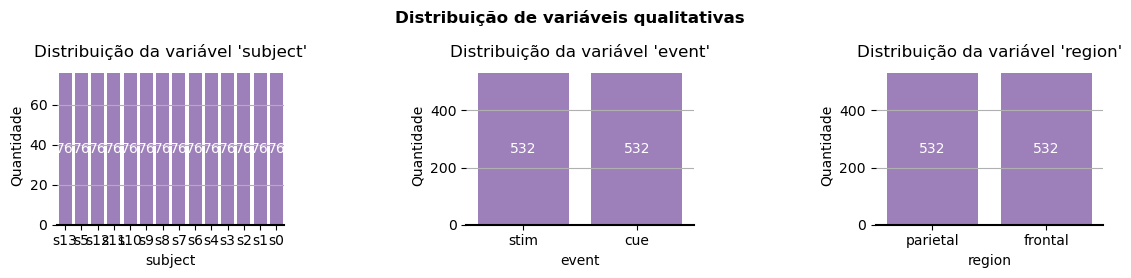

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

- A partir dos gráficos, é possível perceber que as ocorrências dos tipos de cada variável foram distribuídas igualmente.

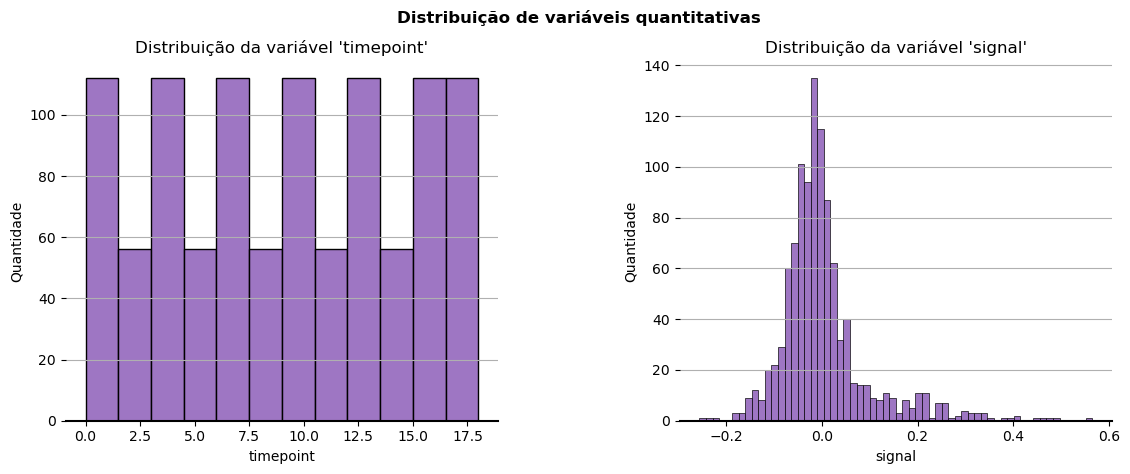

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
    # Customize grid to show only vertical lines
plt.show()

## Relações entre as variavéis

Os gráficos a seguir mostram a relação entre as variáveis signal e timepoint para quando analisados os dados de event e region.

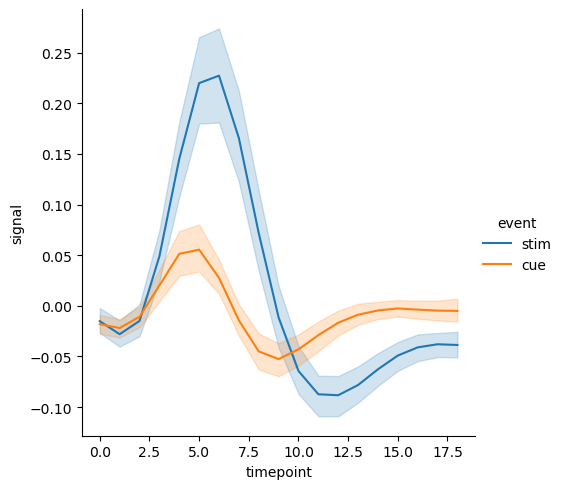

In [9]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=df)

- É possível perceber que as ressonâncias feitas por estímulo 'cue'(sinalização) apresentam um  pico de sinal maior e variação maior do timepoint.

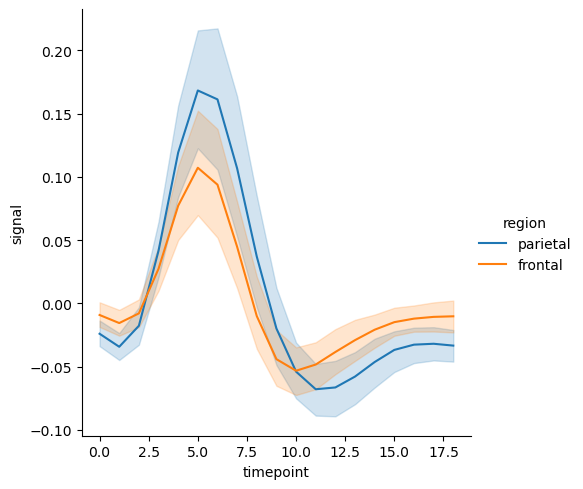

In [10]:
sns.relplot(x="timepoint", y="signal", hue="region", kind="line", data=df)

- As ressonâncias funcionais realizdas na região 'parietal' apresentam um pico de sinal maior.